<a href="https://colab.research.google.com/github/Oluwatobi02/Fashionmodel/blob/main/FashionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install torch transformers pillow matplotlib fastcore fastai duckduckgo-search


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [9]:
from transformers import SegformerImageProcessor, AutoModelForSemanticSegmentation
from PIL import Image
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn as nn
from duckduckgo_search import DDGS #DuckDuckGo has changed the api so we need to update 
from fastcore.all import *
from fastdownload import download_url
from fastai.vision.all import *
import time, json

In [44]:
processor = SegformerImageProcessor.from_pretrained("sayeed99/segformer-b3-fashion")
model = AutoModelForSemanticSegmentation.from_pretrained("sayeed99/segformer-b3-fashion")

In [11]:
def search_images(keywords, max_images=200): 
    return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')


In [ ]:
url = "/content/img.jpg"

image = Image.open(url)
inputs = processor(images=image, return_tensors="pt")

In [ ]:
image

In [ ]:
outputs = model(**inputs)
logits = outputs.logits.cpu()

upsampled_logits = nn.functional.interpolate(
    logits,
    size=image.size[::-1],
    mode="bilinear",
    align_corners=False,
)

In [ ]:
pred_seg = upsampled_logits.argmax(dim=1)[0]

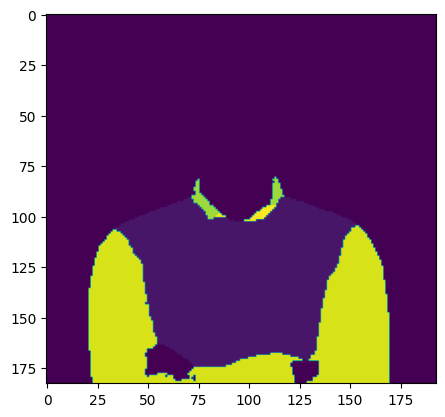

In [ ]:
plt.imshow(pred_seg)

In [ ]:
import numpy as np
unique_cat = np.unique(pred_seg.cpu().numpy())

In [45]:
categories = model.config.id2label

In [ ]:
for i in unique_cat:
  print(categories[i])

unlabelled
top, t-shirt, sweatshirt
collar
sleeve
neckline


In [ ]:
categories.values()

dict_values(['unlabelled', 'shirt, blouse', 'top, t-shirt, sweatshirt', 'sweater', 'cardigan', 'jacket', 'vest', 'pants', 'shorts', 'skirt', 'coat', 'dress', 'jumpsuit', 'cape', 'glasses', 'hat', 'headband, head covering, hair accessory', 'tie', 'glove', 'watch', 'belt', 'leg warmer', 'tights, stockings', 'sock', 'shoe', 'bag, wallet', 'scarf', 'umbrella', 'hood', 'collar', 'lapel', 'epaulette', 'sleeve', 'pocket', 'neckline', 'buckle', 'zipper', 'applique', 'bead', 'bow', 'flower', 'fringe', 'ribbon', 'rivet', 'ruffle', 'sequin', 'tassel'])

In [ ]:
from transformers import ViltProcessor, ViltForQuestionAnswering
import requests
from PIL import Image

# prepare image + question
image = Image.open('/content/IMG_8303.jpg')
text = "what is the color of the socks?"

processor = ViltProcessor.from_pretrained("yanka9/vilt_finetuned_deepfashionVQA_v2")
model = ViltForQuestionAnswering.from_pretrained("yanka9/vilt_finetuned_deepfashionVQA_v2")

# prepare inputs
encoding = processor(image, text, return_tensors="pt")

# forward pass
outputs = model(**encoding)
logits = outputs.logits
idx = logits.argmax(-1).item()
print("Answer:", model.config.id2label[idx])


Answer: blue


In [14]:
import pandas as pd

# Example data: list of combinations
data = [
    {
        "File Name": "combo1.jpg",
        "Items": [
            {"Type": "Shirt", "Color": "Blue", "Style": "Casual"},
            {"Type": "Pants", "Color": "Black", "Style": "Formal"}
        ],
        "Validity": "Valid",
        "Rating": 8
    },
    {
        "File Name": "combo2.jpg",
        "Items": [
            {"Type": "Hoodie", "Color": "Grey", "Style": "Casual"},
            {"Type": "Jeans", "Color": "Dark Blue", "Style": "Casual"},
            {"Type": "Watch", "Color": "Silver", "Style": "Formal"}
        ],
        "Validity": "Invalid",
        "Rating": 4
    }
]
df = pd.DataFrame(data)
# Define max number of items
max_items = 5

# Initialize structured rows
structured_data = []
for combo in data:
    row = {"File Name": combo["File Name"]}
    # Add each item's attributes to fixed columns
    for i in range(max_items):
        if i < len(combo["Items"]):  # Populate existing items
            item = combo["Items"][i]
            row[f"Item{i+1}_Type"] = item["Type"]
            row[f"Item{i+1}_Color"] = item["Color"]
            row[f"Item{i+1}_Style"] = item["Style"]
        else:  # Fill placeholders for missing items
            row[f"Item{i+1}_Type"] = "None"
            row[f"Item{i+1}_Color"] = "None"
            row[f"Item{i+1}_Style"] = "None"
    # Add target variables
    row["Validity"] = 1 if combo["Validity"] == "Valid" else 0
    row["Rating"] = combo["Rating"]
    structured_data.append(row)

# Create DataFrame
df = pd.DataFrame(structured_data)
df


,File Name,Item1_Type,Item1_Color,Item1_Style,Item2_Type,Item2_Color,Item2_Style,Item3_Type,Item3_Color,Item3_Style,Item4_Type,Item4_Color,Item4_Style,Item5_Type,Item5_Color,Item5_Style,Validity,Rating
0,combo1.jpg,Shirt,Blue,Casual,Pants,Black,Formal,None,None,None,None,None,None,None,None,None,1,8
1,combo2.jpg,Hoodie,Grey,Casual,Jeans,Dark Blue,Casual,Watch,Silver,Formal,None,None,None,None,None,None,0,4


In [46]:
ds_cat = categories.copy()
categories

{0: 'unlabelled',
 1: 'shirt, blouse',
 2: 'top, t-shirt, sweatshirt',
 3: 'sweater',
 4: 'cardigan',
 5: 'jacket',
 6: 'vest',
 7: 'pants',
 8: 'shorts',
 9: 'skirt',
 10: 'coat',
 11: 'dress',
 12: 'jumpsuit',
 13: 'cape',
 14: 'glasses',
 15: 'hat',
 16: 'headband, head covering, hair accessory',
 17: 'tie',
 18: 'glove',
 19: 'watch',
 20: 'belt',
 21: 'leg warmer',
 22: 'tights, stockings',
 23: 'sock',
 24: 'shoe',
 25: 'bag, wallet',
 26: 'scarf',
 27: 'umbrella',
 28: 'hood',
 29: 'collar',
 30: 'lapel',
 31: 'epaulette',
 32: 'sleeve',
 33: 'pocket',
 34: 'neckline',
 35: 'buckle',
 36: 'zipper',
 37: 'applique',
 38: 'bead',
 39: 'bow',
 40: 'flower',
 41: 'fringe',
 42: 'ribbon',
 43: 'rivet',
 44: 'ruffle',
 45: 'sequin',
 46: 'tassel'}

In [47]:
del ds_cat[0]

In [50]:
ds_cat[52] = ds_cat[1]
ds_cat[53] = ds_cat[2]
ds_cat[1] = "t-shirts"
ds_cat[2] = "sweatshirts"
ds_cat[49] = "top"
ds_cat[50] = "shirt"
ds_cat[51] = "blouse"

In [51]:
ds_cat.items()

dict_items([(1, 't-shirts'), (2, 'sweatshirts'), (3, 'sweater'), (4, 'cardigan'), (5, 'jacket'), (6, 'vest'), (7, 'pants'), (8, 'shorts'), (9, 'skirt'), (10, 'coat'), (11, 'dress'), (12, 'jumpsuit'), (13, 'cape'), (14, 'glasses'), (15, 'hat'), (16, 'headband, head covering, hair accessory'), (17, 'tie'), (18, 'glove'), (19, 'watch'), (20, 'belt'), (21, 'leg warmer'), (22, 'tights, stockings'), (23, 'sock'), (24, 'shoe'), (25, 'bag, wallet'), (26, 'scarf'), (27, 'umbrella'), (28, 'hood'), (29, 'collar'), (30, 'lapel'), (31, 'epaulette'), (32, 'sleeve'), (33, 'pocket'), (34, 'neckline'), (35, 'buckle'), (36, 'zipper'), (37, 'applique'), (38, 'bead'), (39, 'bow'), (40, 'flower'), (41, 'fringe'), (42, 'ribbon'), (43, 'rivet'), (44, 'ruffle'), (45, 'sequin'), (46, 'tassel'), (52, 'shirt, blouse'), (53, 'top, t-shirt, sweatshirt'), (49, 'top'), (50, 'shirt'), (51, 'blouse')])

In [52]:
other_cat = ["color", "style"]

In [53]:
def create_columns():
    columns = []
    for idx, item in list(ds_cat.items()):
        if idx in [1, 2]:
            continue
        it_col = []
        it_col.append(f"item {idx} type")
        for i in other_cat:
            it_col.append(f"item {idx} {i}")
        columns.extend(it_col)
    return columns
    


In [54]:
fash_col = create_columns()

In [27]:
fash_col

['item 3 type',
 'item 3 color',
 'item 3 style',
 'item 4 type',
 'item 4 color',
 'item 4 style',
 'item 5 type',
 'item 5 color',
 'item 5 style',
 'item 6 type',
 'item 6 color',
 'item 6 style',
 'item 7 type',
 'item 7 color',
 'item 7 style',
 'item 8 type',
 'item 8 color',
 'item 8 style',
 'item 9 type',
 'item 9 color',
 'item 9 style',
 'item 10 type',
 'item 10 color',
 'item 10 style',
 'item 11 type',
 'item 11 color',
 'item 11 style',
 'item 12 type',
 'item 12 color',
 'item 12 style',
 'item 13 type',
 'item 13 color',
 'item 13 style',
 'item 14 type',
 'item 14 color',
 'item 14 style',
 'item 15 type',
 'item 15 color',
 'item 15 style',
 'item 16 type',
 'item 16 color',
 'item 16 style',
 'item 17 type',
 'item 17 color',
 'item 17 style',
 'item 18 type',
 'item 18 color',
 'item 18 style',
 'item 19 type',
 'item 19 color',
 'item 19 style',
 'item 20 type',
 'item 20 color',
 'item 20 style',
 'item 21 type',
 'item 21 color',
 'item 21 style',
 'item 22 type